In [1]:
import sys
import numpy as np              #Ni se si lo necesito pero porsi
from scipy import signal,misc   #Procesamiento de señales
import matplotlib.pyplot as plt #Para graficar
import pandas as pd             #Para cargar datos
import requests

Importados los modulos, luego se descarga el archivo



In [2]:
def wget(url):
    r = requests.get(url, allow_redirects=True)
    with open(url[url.rfind('/') + 1::], 'wb') as f:
        f.write(r.content)
#Descarga el archivo
def descargar():
    wget("https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/electrocardiograma.xlsx")
    archivo=pd.read_excel("electrocardiograma.xlsx",index_col=0) #Cargado archivo en dataframe
    return archivo


In [3]:
def incorporado(): #usar los datos incorporados
    ecg=misc.electrocardiogram()
    fs=360
    tiempo = np.arange(ecg.size) / fs
    archivo=pd.DataFrame({'señal':list(ecg),'tiempo':list(tiempo)},columns=['señal','tiempo'])
    return archivo

Elija si desea descargar el archivo o usar el archivo incorporado


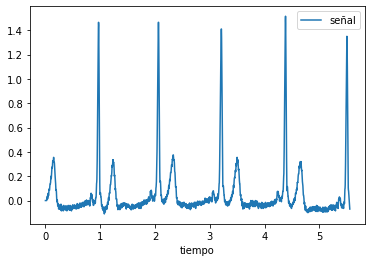

In [4]:
archivo=[]
function_dict={"descargar":descargar,"incorporado":incorporado}
print("Elija si desea descargar el archivo o usar el archivo incorporado")
opcion=input('Ingrese "descargar" o "incorporado":')
archivo=function_dict[opcion]()
datos=archivo[archivo["tiempo"]<7]
datos.plot(x="tiempo",y="señal")
sig=archivo["señal"]
t=archivo["tiempo"]
ts=t.values[-1]/t.size
fs=1/ts


Gráfica básica de la señal en cuestion

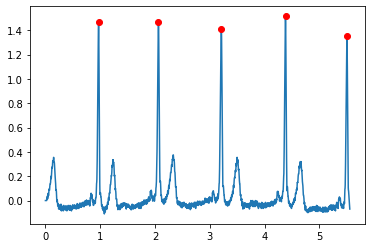

In [5]:
#intentando obtener los picos, falta resolver que se hace con eso
plt.plot(datos["tiempo"],datos["señal"])
picos,prop=signal.find_peaks(datos["señal"],prominence=(1,None))
for pico in picos:
    plt.plot(datos["tiempo"][pico],datos["señal"][pico],'ro')

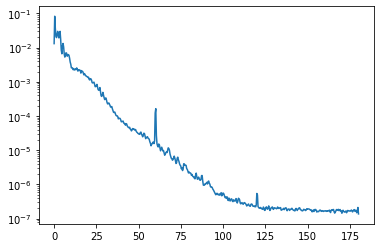

In [6]:
#analisis espectral de la señal
f,espectro=signal.welch(archivo["señal"],fs=1/ts,nperseg=1024)
plt.semilogy(f,espectro)
nombre_archivo=input("Ingrese un nombre de archivo para guardar el espectro del ECG: ")
plt.savefig(nombre_archivo)
#guarda el archivo con el nombre dado. 
#faltaria sacar potencia en 60hz